In [1]:
%load_ext autoreload
%autoreload 2

# Dataset Creation

In [2]:
from preprocess import make_dataset
import pandas as pd
import numpy as np
import os

# Extract all the midi files 

midi_files = []

for path, subdirs, files in os.walk(r'./maestro-v3.0.0/'):
    for name in files:
        if (name.endswith('.midi') or name.endswith('.mid')):
            midi_files.append(os.path.join(path, name))

In [3]:
TEST_FILE = r'./maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi'


In [4]:
df = make_dataset(midi_files, file_name="datasets/maestro.csv")


Processing Files...: 100%|██████████| 1276/1276 [10:20<00:00,  2.06files/s, ./maestro-v3.0.0/2018\MIDI-Unprocessed_Schubert7-9_MID--AUDIO_16_R2_2018_wav.midi]                          


In [ ]:
import pretty_midi
from models.data_split import NUM_MIDI_NOTES, VOCABULARY
import matplotlib.pyplot as plt
import librosa

In [36]:
toks = df.iloc[0]['notes']
durations = df.iloc[0]['durations']
times = df.iloc[0]["times"]
velocities = df.iloc[0]['velocities']

In [37]:
print(toks)
print(durations)
print(times)

[128, 71, 130, 55, 130, 71, 130, 59, 130, 62, 130, 72, 130, 67, 130, 74, 130, 57, 129, 72, 130, 74, 130, 72, 130, 67, 130, 66, 130, 71, 130, 64, 130, 72, 130, 74, 130, 59, 130, 62, 130, 66, 130, 67, 130, 71, 130, 74, 130, 78, 130, 59, 130, 79, 130, 76, 130, 60, 130, 79, 130, 74, 130, 59, 130, 79, 130, 72, 130, 57, 130, 71, 130, 72, 130, 66, 130, 81, 130, 72, 130, 55, 130, 71, 130, 69, 130, 59, 130, 67, 130, 71, 130, 62, 130, 54, 130, 67, 130, 52, 130, 50, 130, 49, 130, 64, 130, 76, 130, 69, 130, 52, 130, 76, 130, 57, 130, 67, 130, 66, 130, 49, 130, 67, 130, 76, 130, 67, 130, 50, 130, 66, 130, 64, 130, 54, 130, 62, 130, 64, 130, 57, 130, 66, 130, 67, 130, 48, 130, 66, 130, 47, 130, 67, 130, 50, 129, 69, 130, 67, 130, 55, 130, 69, 130, 71, 130, 45, 130, 69, 130, 71, 130, 69, 130, 54, 130, 67, 130, 69, 130, 71, 130, 55, 130, 43, 130, 47, 130, 50, 130, 55, 130, 71, 130, 76, 130, 57, 130, 59, 130, 75, 130, 59, 130, 60, 130, 76, 130, 78, 130, 55, 130, 64, 130, 76, 130, 78, 130, 79, 130, 57, 

In [39]:
midi_file = pretty_midi.PrettyMIDI(resolution=480)

piano = pretty_midi.Instrument(0)

time = 0
duration = durations[0]
tpq = midi_file.resolution

v_itr = 0
d_itr = 0
t_itr = 0

for i, tok in enumerate(toks):
    if tok < NUM_MIDI_NOTES:
        print(time, tok, duration)
        note = pretty_midi.Note(velocity=velocities[v_itr], pitch=tok, start=time / tpq, end=(time + duration) / tpq)
        v_itr += 1
        piano.notes.append(note)
    elif tok == VOCABULARY['EOS']:
        break # Stop Generating for EOS
    elif tok == VOCABULARY['SEP']:
        duration = durations[d_itr]
        d_itr += 1
    elif tok == VOCABULARY['BEAT']:
        t_itr += 1
        time += times[t_itr]
        d_itr += 1
        duration = durations[d_itr]


midi_file.instruments.append(piano)

midi_file.write("test.mid")

0 71 46.5
89.5 55 104.5
94.0 71 242.5
178.0 59 80.5
259.5 62 57.5
333.0 72 20.0
341.0 67 94.5
427.5 74 55.0
453.5 57 259.0
453.5 72 259.0
482.5 74 40.5
507.0 72 178.0
518.0 67 52.0
593.0 66 87.0
686.5 71 32.0
703.5 64 98.5
719.0 72 40.0
761.5 74 369.0
777.5 59 339.5
861.5 62 108.5
954.0 66 92.5
1035.5 67 997.5
1133.0 71 71.5
1213.0 74 89.5
1299.0 78 109.0
1303.0 59 76.5
1392.0 79 99.5
1478.5 76 81.5
1483.0 60 72.5
1563.0 79 82.5
1644.5 74 79.5
1647.0 59 87.0
1730.0 79 96.5
1824.5 72 83.5
1837.0 57 186.0
1913.0 71 86.5
2006.0 72 86.0
2009.0 66 161.5
2087.0 81 93.5
2179.5 72 78.5
2180.0 55 347.5
2264.5 71 91.0
2358.5 69 76.0
2363.5 59 22.5
2439.5 67 102.5
2531.0 71 349.0
2540.0 62 115.0
2622.5 54 83.5
2707.0 67 16.0
2707.5 52 57.0
2777.5 50 103.5
2881.5 49 378.0
2887.5 64 113.0
2971.5 76 84.5
3057.5 69 86.0
3059.5 52 23.0
3152.0 76 92.5
3234.0 57 547.0
3239.0 67 78.5
3326.0 66 82.5
3410.5 49 52.0
3414.5 67 82.0
3495.0 76 93.5
3587.5 67 80.0
3589.0 50 357.0
3666.5 66 123.5
3766.5 64 82.0


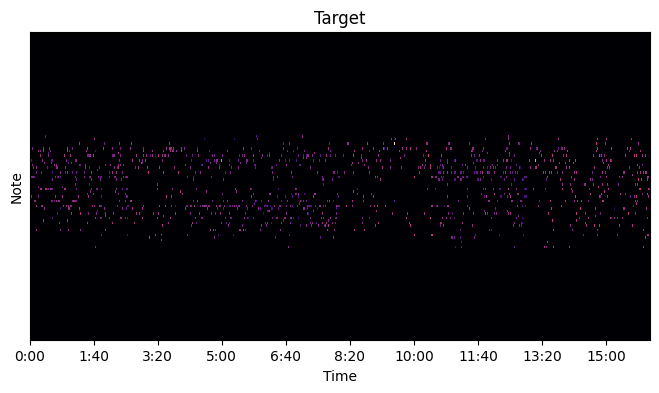

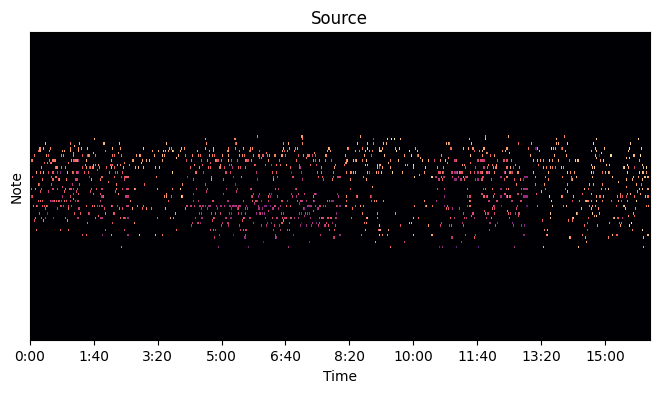

480


In [41]:
fs = 40

plt.figure(figsize=(8, 4))
plt.title("Target")
librosa.display.specshow(midi_file.get_piano_roll(fs),
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note')
plt.show()

target = pretty_midi.PrettyMIDI(TEST_FILE)
plt.figure(figsize=(8, 4))
plt.title("Source")
librosa.display.specshow(target.get_piano_roll(fs),
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note')
plt.show()

print(target.resolution)

# Dataset Analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("datasets/maestro.csv")

In [8]:
lengths = df.notes.apply(lambda x: len(x))

(array([ 1.,  5.,  5.,  8., 16., 24., 46., 48., 35., 42., 61., 56., 37.,
        47., 23., 40., 33., 19., 17., 28., 24., 26., 17., 26., 28., 24.,
        12., 16., 22., 33., 37., 23., 22., 23.,  6.,  9., 34., 26., 29.,
        20., 14., 10.,  5.,  8.,  3.,  5.,  5.,  5.,  9.,  7.,  6.,  1.,
         5.,  1.,  0.,  2.,  3.,  2.,  5.,  4.,  7.,  6.,  6.,  4.,  7.,
         7.,  4.,  1.,  3.,  1.,  5.,  1.,  4.,  0.,  0.,  0.,  1.,  2.,
         3.,  1.,  5.,  4.,  4.,  2.,  7.,  3.,  2.,  2.,  1.,  2.,  1.,
         4.,  1.,  4.,  2.,  2.,  7.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
         2.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1162.      ,   2914.578125,   4667.15625 ,   6419.734375,
          8172.3125  ,   9924.890625,  11677.46875 ,  13430.046875,
         15182.625   ,  16935.203125,  18687.78125 ,  20440.359375,
         22192.9375  ,  23945.515625,  25698.09375 ,  27450.671875,
      

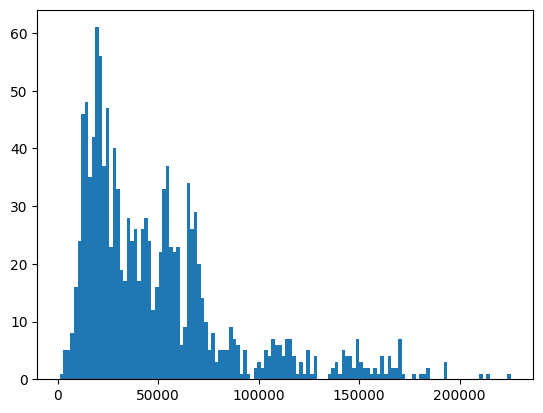

In [9]:
plt.hist(lengths, bins=128)

In [49]:
df['notes'] = df.notes.apply(lambda x: [int(y) for y in str(x).removeprefix('[').removesuffix(']').split(' ') if y.isnumeric()])
df['velocities'] = df.velocities.apply(lambda x: [int(y) for y in str(x).removeprefix('[').removesuffix(']').split(' ') if y.isnumeric()])
df['times'] = df.times.apply(lambda x: [float(y) for y in str(x).removeprefix('[').removesuffix(']').split(' ') if y.replace('.', '').replace('e+', '').replace('e-','').isnumeric()])
df['durations'] = df.durations.apply(lambda x: [float(y) for y in str(x).removeprefix('[').removesuffix(']').split(' ') if y.replace('.', '').replace('e+', '').replace('e-','').isnumeric()])

In [50]:
print(df.iloc[11088])

plt.plot(df['times'][11088])

IndexError: single positional indexer is out-of-bounds

In [ ]:
note_bins = [0 for i in range(0, 200)]
velocity_bins = [0 for i in range(0, 128)]
duration_means = []
duration_std = []

time_means = []
time_std = []

for i in range(0, len(df['notes'])):
    for x in df['notes'][i]:
        note_bins[x] += 1

    for x in df['velocities'][i]:
        velocity_bins[x] += 1
    
    duration_means.append(np.mean(df['durations'][i]))
    duration_std.append(np.std(df['durations'][i]))

    time_means.append(np.mean(df['times'][i]))
    time_std.append(np.std(df['times'][i]))


In [ ]:
plt.plot(note_bins)
plt.xlim((0, 127))
plt.ylim(0, max(note_bins[0:128]))
plt.show()

In [ ]:
p = duration_means
q = duration_std
p[np.argmax(duration_means)] = 0
q[np.argmax(duration_std)] = 0

plt.scatter(p, q)

In [ ]:
p = time_means
q = time_std
p[np.argmax(time_means)] = 0
p[np.argmax(time_means)] = 0

q[np.argmax(time_std)] = 0
q[np.argmax(time_std)] = 0

plt.scatter(p,q)

In [ ]:
plt.plot(velocity_bins)
plt.xlim((0, 127))
plt.ylim(0, max(velocity_bins[0:128]))
plt.show()

In [ ]:
# Analysis specific to duration.
# We want to determine if we can quantize it some Gaussian noise

vals = []
losses_mean = []
losses_std = []
D = 32

for D in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    L = []
    for track in df['durations']:
        p = np.array(track)
        l = D * p - np.trunc(D * p) 

        L.append(np.mean(l))
    L = np.array(L)
    losses_mean.append(np.mean(L))
    losses_std.append(np.std(L))

        

In [ ]:
plt.plot(losses_mean)
plt.plot(losses_std)

In [1]:
import pretty_midi as pm

In [13]:
FILE = r'Ode to Joy from the 9th Symphony.mid'
midi = pm.PrettyMIDI(FILE)

In [74]:
import math 
midi.remove_invalid_notes()

resolution = midi.resolution
qpt = 1.0 / resolution

for instrument in midi.instruments:
    bundles = []

    i = 0

    notes_list = sorted(instrument.notes, key = lambda x: x.start) 

    while i < len(notes_list):
        bundle = []  

        bnote :pm.Note = None   
        while i < len(notes_list): 
            note : pm.Note = notes_list[i]

            if len(bundle) == 0:
                bundle.append(note)
                bnote = note 
                i = i + 1
            elif math.isclose(midi.time_to_tick(note.start), midi.time_to_tick(bnote.start), rel_tol=1e-5) and \
                math.isclose(midi.time_to_tick(note.end), midi.time_to_tick(bnote.end), rel_tol=1e-5):
                bundle.append(note)
                i = i + 1
            else: 
                bundles.append(bundle)
                break
        
        if i >= len(instrument.notes):
            bundles.append(bundle)

bundles = sorted(bundles, key=lambda x: x[0].start)

count = 0
for x in bundles:
    print(x)
    count += len(x)

print(count, len(midi.instruments[0].notes))


[Note(start=0.416666, end=0.624131, pitch=69, velocity=127), Note(start=0.416666, end=0.624131, pitch=57, velocity=127), Note(start=0.416666, end=0.624131, pitch=62, velocity=127), Note(start=0.416666, end=0.624131, pitch=65, velocity=127)]
[Note(start=0.416666, end=0.936630, pitch=82, velocity=127), Note(start=0.416666, end=0.936630, pitch=70, velocity=127), Note(start=0.416666, end=0.936630, pitch=74, velocity=127), Note(start=0.416666, end=0.936630, pitch=77, velocity=127)]
[Note(start=0.624999, end=0.676214, pitch=45, velocity=127), Note(start=0.624999, end=0.676214, pitch=41, velocity=127)]
[Note(start=0.677082, end=0.728297, pitch=53, velocity=127)]
[Note(start=0.729165, end=0.780381, pitch=41, velocity=127), Note(start=0.729165, end=0.780381, pitch=45, velocity=127)]
[Note(start=0.781249, end=0.832464, pitch=53, velocity=127)]
[Note(start=0.833332, end=0.884547, pitch=45, velocity=127), Note(start=0.833332, end=0.884547, pitch=41, velocity=127)]
[Note(start=0.885415, end=0.93663